In [3]:
import os
import json
import statistics
import matplotlib.pyplot as plt

In [4]:
model_name = 'ant'
policy = 'dmap-icl'
sigma_train = '01'
sigmas_test = ['01']
seed = 2

In [10]:
PATH = f'./data/{model_name}/performance'
files = [
    filename for filename in os.listdir(PATH) if 'results' in filename
]
files_icl = [filename for filename in files if 'dmap-icl' in filename]
icl_results = {}

for filename in files_icl:
    with open(os.path.join(PATH, filename), 'r') as json_file:
        json_res = json.load(json_file)
        steps = int(filename.split('_')[-1].split('.')[0])
        icl_results[steps] = {}
        for sigma_test in sigmas_test:
            icl_results[steps][sigma_test] = json_res[f'{model_name}_{policy}_sigma_{sigma_train}_seed_{seed}']['results'][f'test_sigma_between_0_{sigma_test}']

icl_results = dict(sorted(icl_results.items()))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 100, 500, 1000, 2000, 5000, 10000, 50000, 100000]
{'01': [831.4072026570758, 1653.4176907936226, 2211.455265700906, 2184.554766488111, 2211.7076869362677, 2161.1032957159077, 2147.0139802868925, 2188.6196715281217, 2197.083656759822, 2209.1100460608004, 2204.761300863321, 2205.015755623962, 2219.5253127277824, 2176.128550574541, 2250.51874974879, 2220.271360235107, 2207.7488939879295, 2251.6548295718644]}


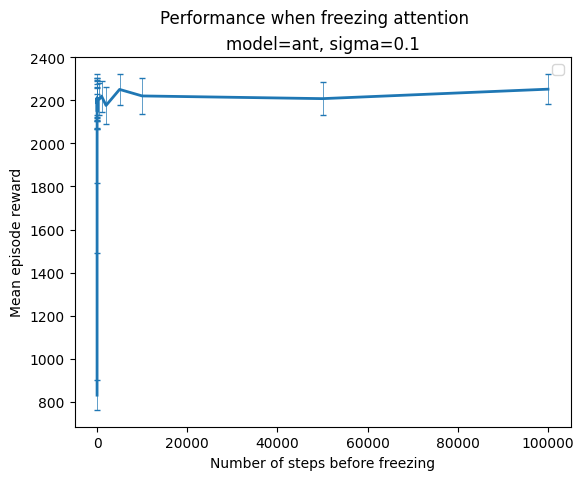

In [12]:
x = []
mean = {}
std = {}

for key in icl_results.keys():
    if key % 5 == 0:
        x.append(key)
for sigma in sigmas_test:
    mean[sigma] = []
    std[sigma] = []
    for key in icl_results.keys():
        if key % 5 == 0:
            mean[sigma].append(statistics.mean(icl_results[key][sigma]))
            std[sigma].append(statistics.stdev(icl_results[key][sigma]) / 2)

print(x)
print(mean)
plt.xscale('log')
plt.xlabel('Number of steps before freezing')
plt.ylabel('Mean episode reward')
for sigma in mean.keys():
    # plt.plot(x, mean[sigma], '-', label=f'sigma={sigma_train[0]}.{sigma_train[1]}')
    plt.errorbar(x, mean[sigma], yerr=std[sigma], linewidth=2, elinewidth=0.5, capsize=2)
    # plt.plot(x, mean[sigma], 'o')
plt.title(f'model={model_name}, sigma={sigma_train[0]}.{sigma_train[1]}')
plt.suptitle('Performance when freezing attention')
plt.legend()